서로 다른 두 직군(수의사, 간호사)의 청와대 국민청원 참여도와 SNS 채널별 참여양태를 분석하기 위해
청와대 홈페이지(http://www.president.go.kr/)내 특정 URL을 지정해 댓글 리스트를 크롤링하고
SNS채널을 구분해 시각화하는 코드입니다.

In [1]:
import re
import json
import math
import datetime
import requests
import urllib.request
import urllib.error
import urllib.parse
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from numpy import nan as NA
from pandas import Series,DataFrame
import csv
from time import sleep
from collections import Counter

In [3]:
wg_ptn = r'naver|facebook|kakao|twitter'
wg_regex = re.compile(wg_ptn)

In [ ]:
kind_total=[]
for page_num in range(1,1010):
    response = urllib.request.urlopen('https://www1.president.go.kr/petitions/579646?page='+str(page_num))
    #국민청원 페이지는 /petitions/고유번호 의 형식으로 구성되며
    #?page=페이지번호 parameter로 댓글 페이지를 넘겨가면서 크롤링 할 수 있습니다.
    response_body = response.read()
    soup = BeautifulSoup(response_body.decode('utf-8'), 'html.parser')
    kind_list = soup.select('#petitionsReply_area > div.petitionsReply_Reply > ul > li > div > div.pv3_R_contents_head > h4')
    kind_total = kind_total + list(map(lambda x : wg_regex.search(str(x)).group(),kind_list))
    #참여가능한 SNS채널 중 어느 하나가 검출되면, 해당 내용을 kind_total list에 삽입합니다.
    print(str(page_num) + " 쪽 작업완료")
    sleep(4)

In [ ]:
kind_total #단순히 SNS 채널별 비율을 보기 위한 것이니, 1차원 list 형식으로 저장합니다.

In [18]:
# vet.txt에 \n을 기준으로 한 txt 파일로 결과를 저장해둡니다.
with open('C:\\Users\\Username\\president_analysis\\vet.txt', 'w') as file:
    for item in kind_total:
        file.write("%s\n" % item)
#저장한 결과는 나중에 다시 변수로 불러올 수도 있습니다.
with open('C:\\Users\\Username\\president_analysis\\vet.txt', 'r') as file:
    kind_total = [line.strip() for line in file]

In [24]:
Counter(kind_total) #Counter 모듈로 간단히 수치를 확인할 수 있습니다.

Counter({'facebook': 567, 'naver': 6288, 'kakao': 3076, 'twitter': 159})

In [ ]:
#이번에는 간호사 청원의 결과를 크롤링합니다. 기본적인 형식은 수의사쪽 코드와 같습니다.
nurse_kind_total=[]
for page_num in range(1,7550):
    response = urllib.request.urlopen('https://www1.president.go.kr/petitions/529259?page='+str(page_num))
    response_body = response.read()
    soup = BeautifulSoup(response_body.decode('utf-8'), 'html.parser')
    nurse_kind_list = soup.select('#petitionsReply_area > div.petitionsReply_Reply > ul > li > div > div.pv3_R_contents_head > h4')
    nurse_kind_total = nurse_kind_total + list(map(lambda x : wg_regex.search(str(x)).group(),nurse_kind_list))
    print(str(page_num) + " 쪽 작업완료")
    sleep(1)

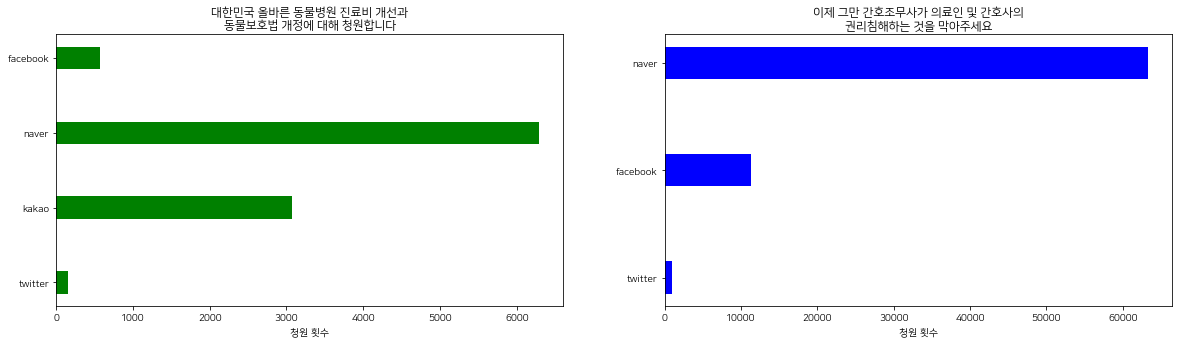

In [71]:
#subplot을 나누고 두 개의 데이터에 대해 barplot을 그려봅니다.

import matplotlib.pyplot as plt
plt.rc('font', family='nanumsquare')

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))

keys1 = Counter(kind_total).keys()
pos1 = np.arange(len(Counter(kind_total).keys()))
performance1 = np.fromiter(Counter(kind_total).values(), dtype=int)

keys2 = Counter(nurse_kind_total).keys()
pos2 = np.arange(len(Counter(nurse_kind_total).keys()))
performance2 = np.fromiter(Counter(nurse_kind_total).values(), dtype=int)

ax1.barh(pos1, performance1, align='center',color='green',height=0.3)
ax1.set_yticks(pos1)
ax1.set_yticklabels(keys1)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('청원 횟수')
ax1.set_title('대한민국 올바른 동물병원 진료비 개선과\n동물보호법 개정에 대해 청원합니다')

ax2.barh(pos2, performance2, align='center',color='blue', height=0.3)
ax2.set_yticks(pos2)
ax2.set_yticklabels(keys2)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('청원 횟수')
ax2.set_title('이제 그만 간호조무사가 의료인 및 간호사의\n권리침해하는 것을 막아주세요')


plt.show()